In [103]:
import os
import numpy as numpy
import mne
import matplotlib.pyplot as plt
#
files_name = mne.datasets.eegbci.load_data(subject=1, runs=[3, 7, 11],path=os.getenv('HOME') + '/goinfre')
print(files_name)


['/mnt/nfs/homes/clorin/goinfre/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R03.edf', '/mnt/nfs/homes/clorin/goinfre/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R07.edf', '/mnt/nfs/homes/clorin/goinfre/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R11.edf']


In [104]:
# raw = mne.io.read_raw_edf(files_name[0], preload=True)
raw = mne.io.concatenate_raws([mne.io.read_raw_edf(f, preload=True) for f in files_name])
sfreq = raw.info['sfreq']
print(f"sfreq = {sfreq}")

Extracting EDF parameters from /mnt/nfs/homes/clorin/goinfre/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /mnt/nfs/homes/clorin/goinfre/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /mnt/nfs/homes/clorin/goinfre/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
sfreq = 160.0


In [105]:
events, event_id = mne.events_from_annotations(raw, event_id=dict(T0=0, T1=1, T2=2), verbose=True)
print(events.shape)
print(event_id.items())

Used Annotations descriptions: ['T0', 'T1', 'T2']
(90, 3)
dict_items([('T0', 0), ('T1', 1), ('T2', 2)])


In [106]:
annotations = mne.annotations_from_events(events=events, sfreq=sfreq, event_desc={0: "rest", 1: "left fist", 2:"right fist"}, verbose=True)
print(annotations)

<Annotations | 90 segments: left fist (23), rest (45), right fist (22)>


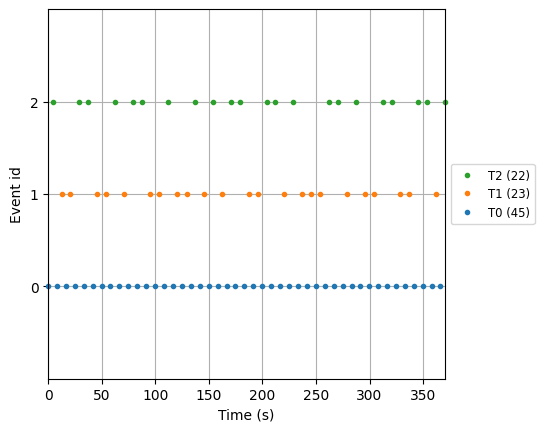

In [115]:
fig = mne.viz.plot_events(events, sfreq=sfreq, first_samp=raw.first_samp, event_id=event_id)
fig.subplots_adjust(right= 0.7)

In [107]:
raw = raw.set_annotations(annotations=annotations, verbose = True)

In [108]:
mne.datasets.eegbci.standardize(raw=raw)


In [ ]:
montage = mne.channels.make_standard_montage("biosemi64")
raw.set_montage(montage, on_missing='ignore')
raw.plot(scalings=dict(eeg=250e-6))

Effective window size : 1.600 (s)


/mnt/nfs/homes/clorin/.local/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


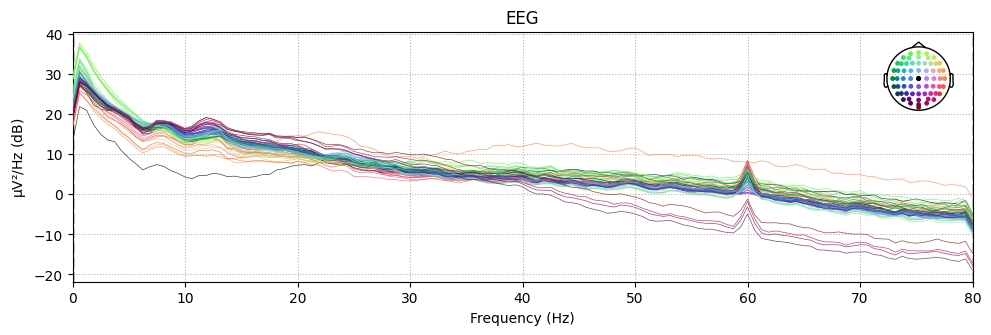

In [112]:
raw.compute_psd(picks='all').plot()